In [31]:
import pandas as pd
from typing import List
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_fscore_support

In [32]:
#load dataset
df = pd.read_csv('Dataset/diabetes.csv')

In [33]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [34]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

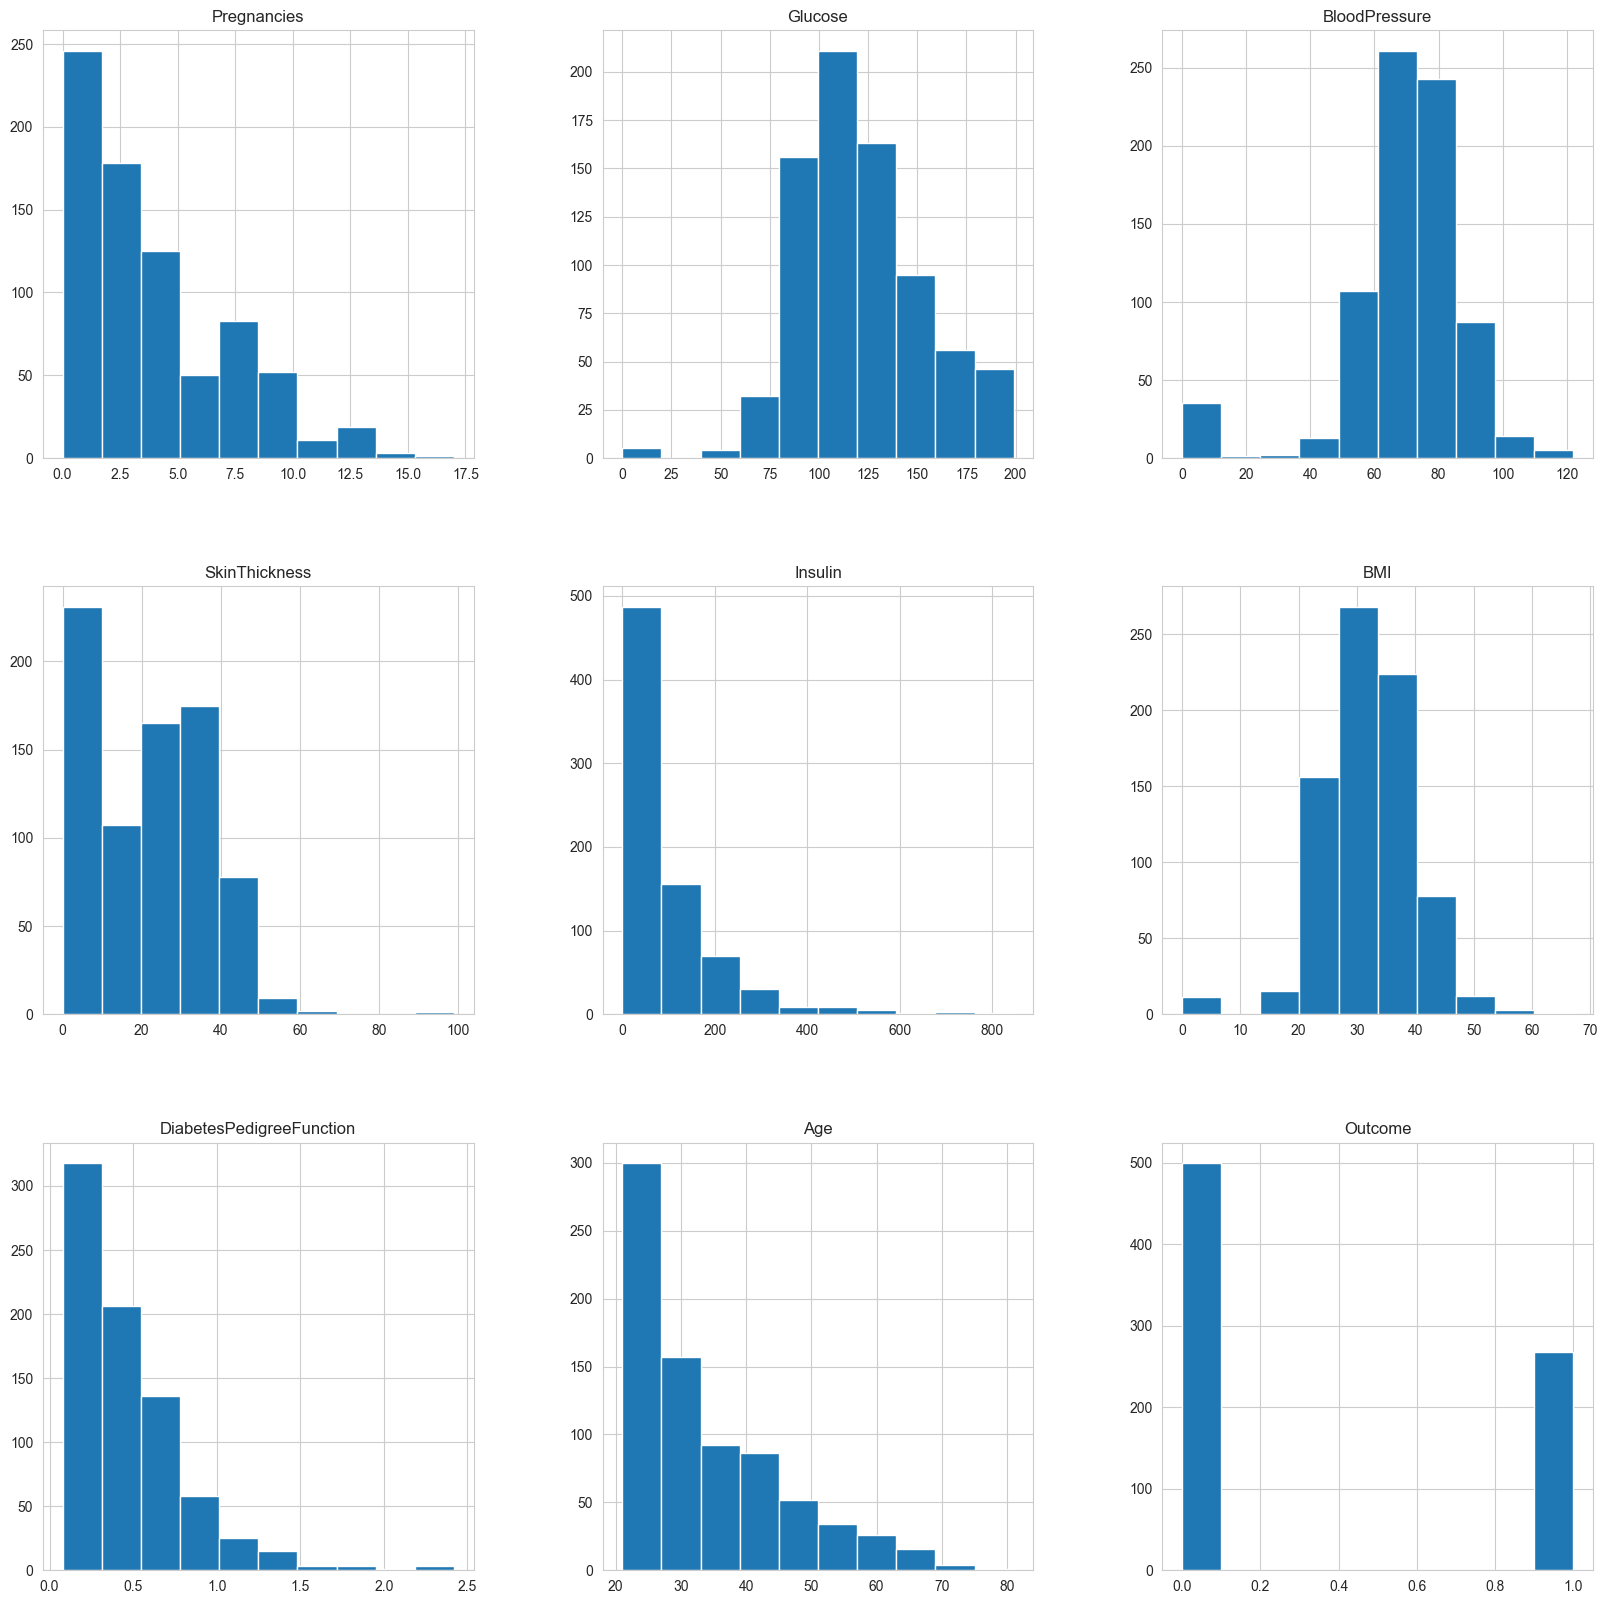

In [36]:
# Histogram of all features
df.hist(figsize=(20, 20))

<Figure size 3400x800 with 0 Axes>

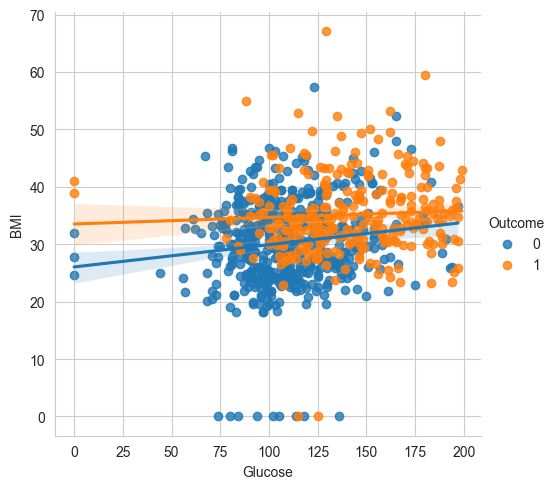

In [37]:
plt.figure(figsize=(34,8))
sns.set_style("whitegrid")
sns.lmplot(x='Glucose', y='BMI', data=df, hue='Outcome')

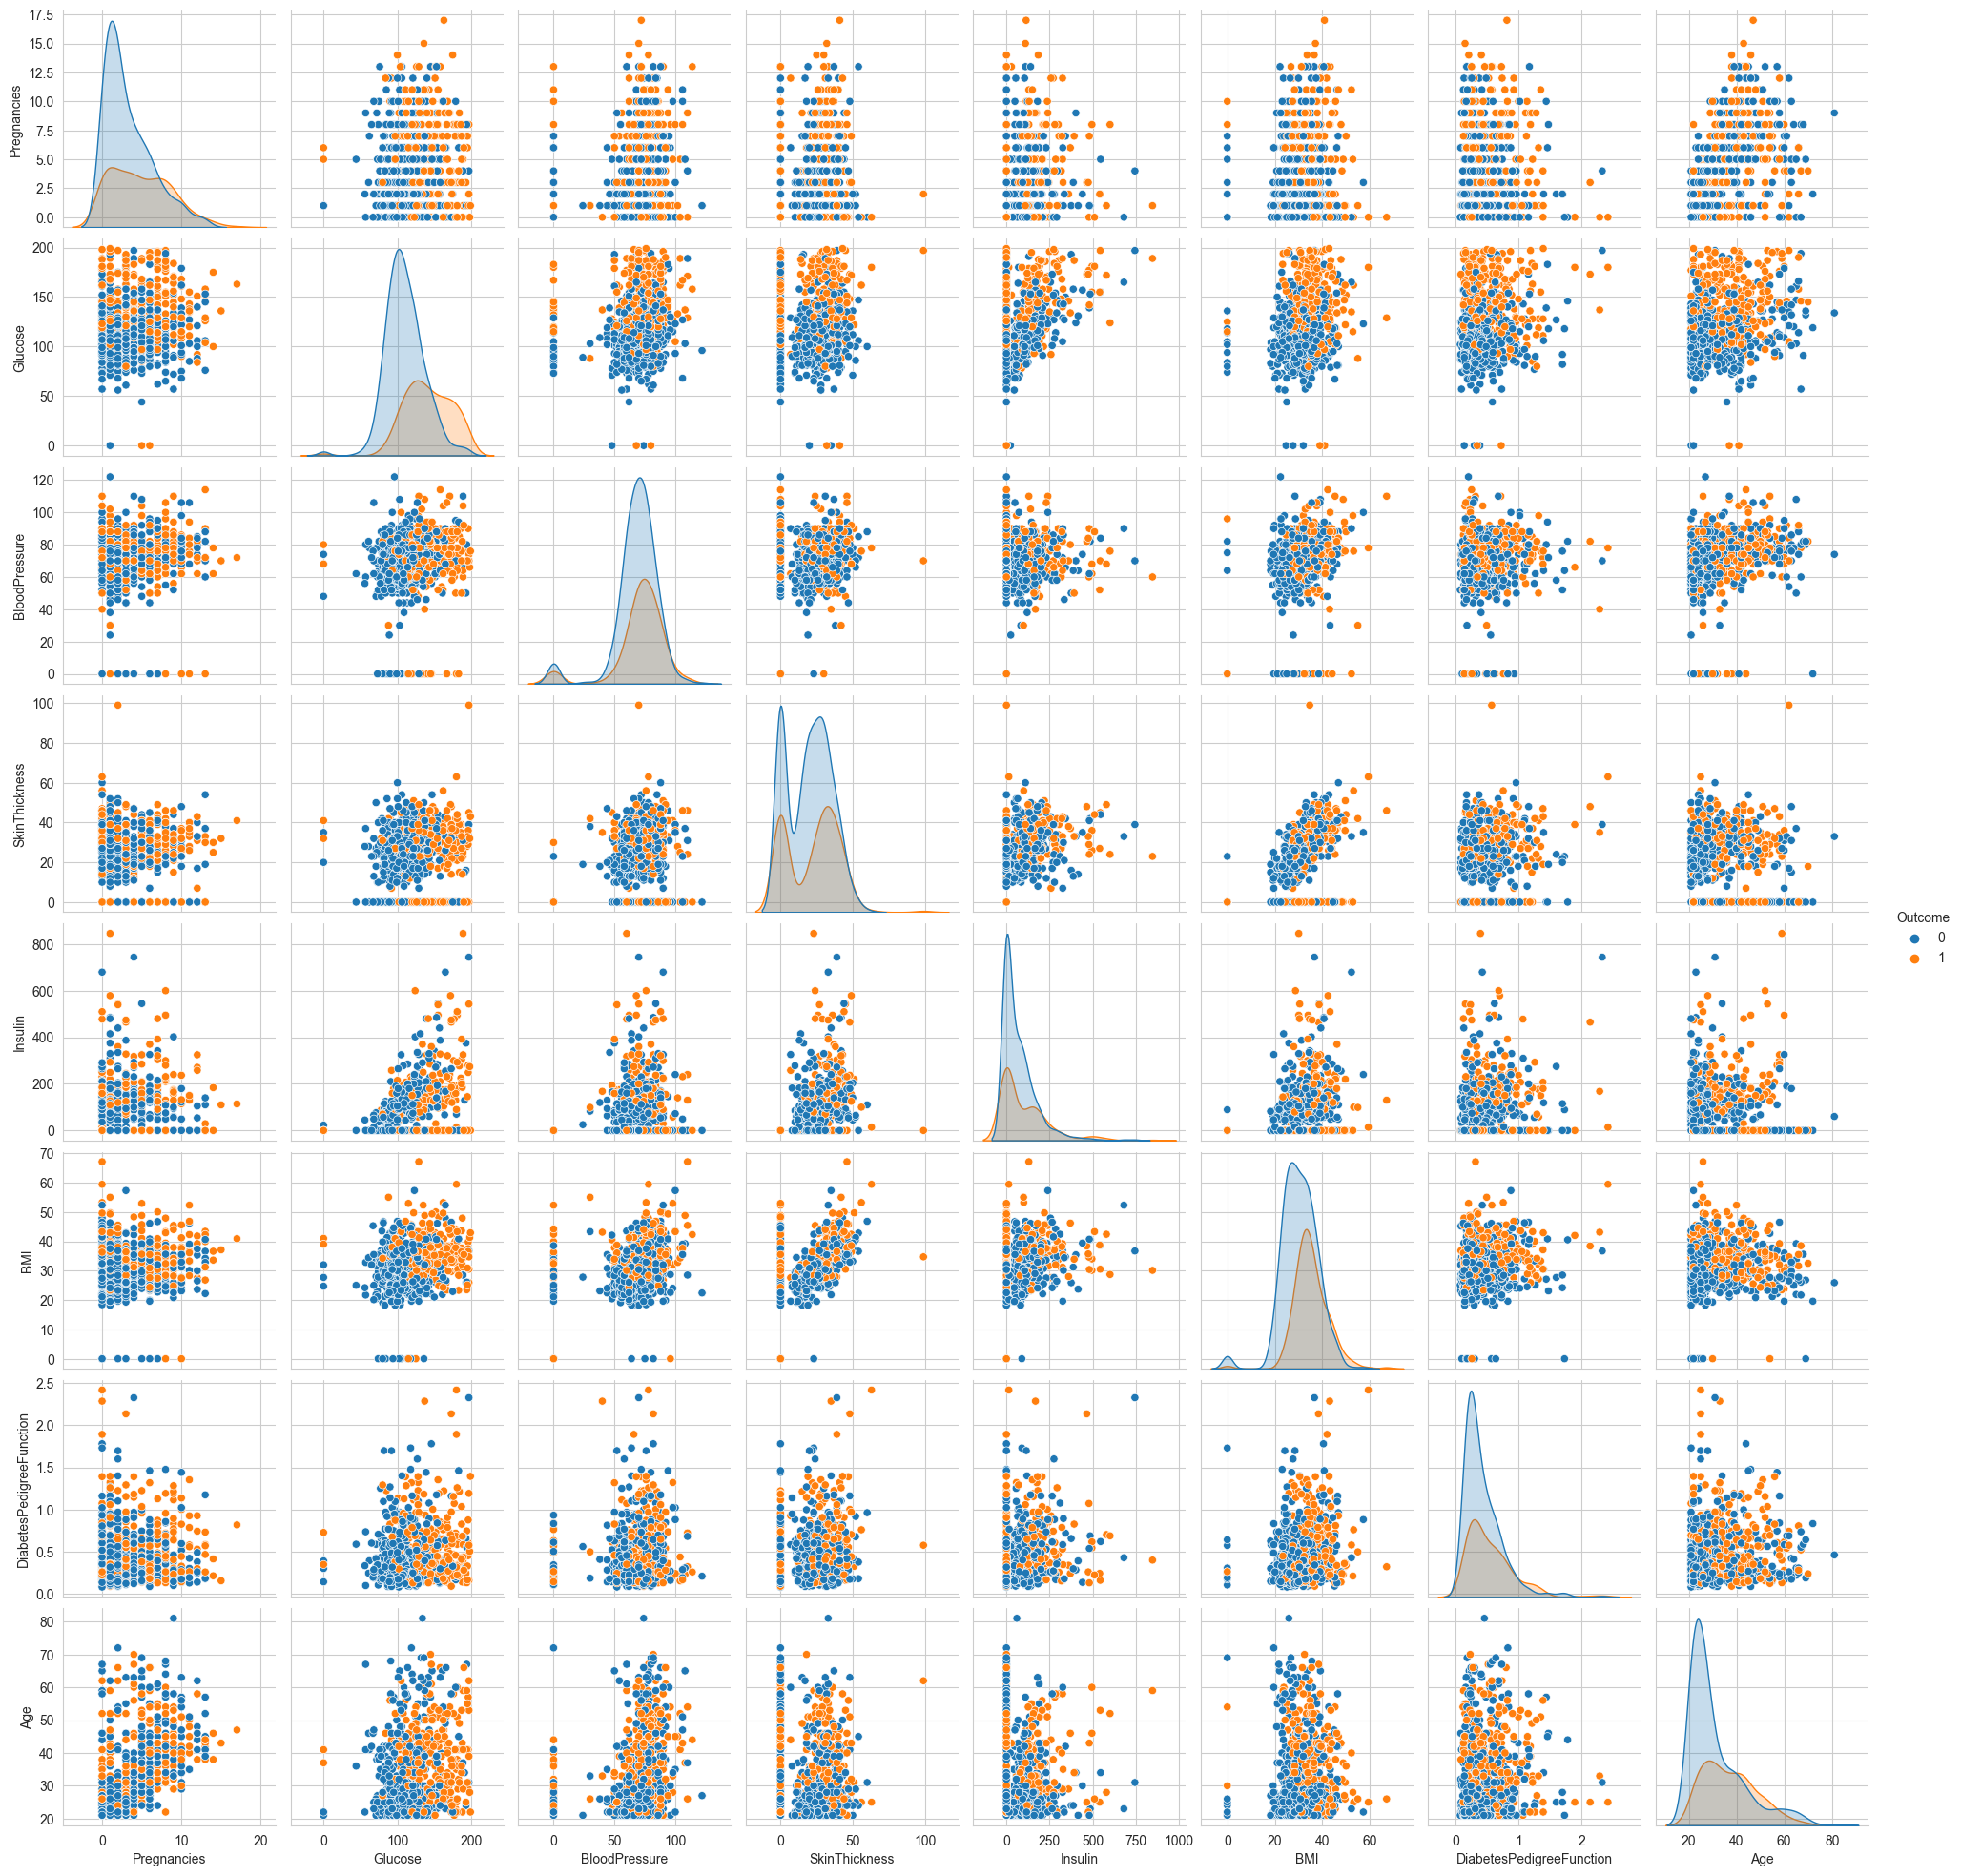

In [38]:
sns.pairplot(data=df, hue='Outcome')

### Individual bar plots

<AxesSubplot:xlabel='Outcome', ylabel='count'>

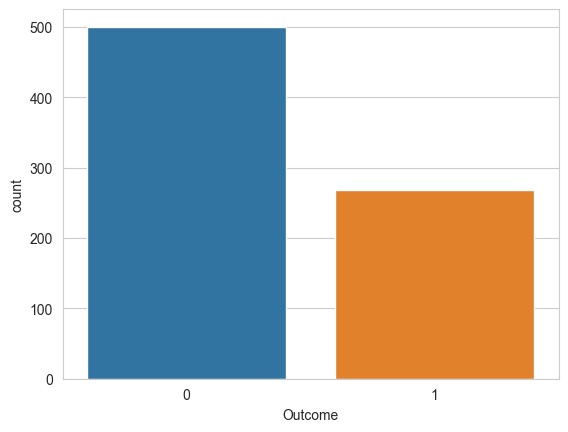

In [39]:
# bar plot of the number of patients with diabetes and without diabetes
sns.countplot(x='Outcome', data=df)

In [40]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Stratified sampling on output feature

In [41]:
#Stratified sampling on output feature
df.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

### One hot encoding for categorical features 

In [42]:
# type of features in the dataset
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

##### Encoding the Categorical values into numerical values is not required in this dataset. Because all values we have floating type only. we have name column as a categorical values but we are not going to use that column in model prediction.

##### So no need to apply label encoding...

### Co relation matrix

In [43]:
corr = df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


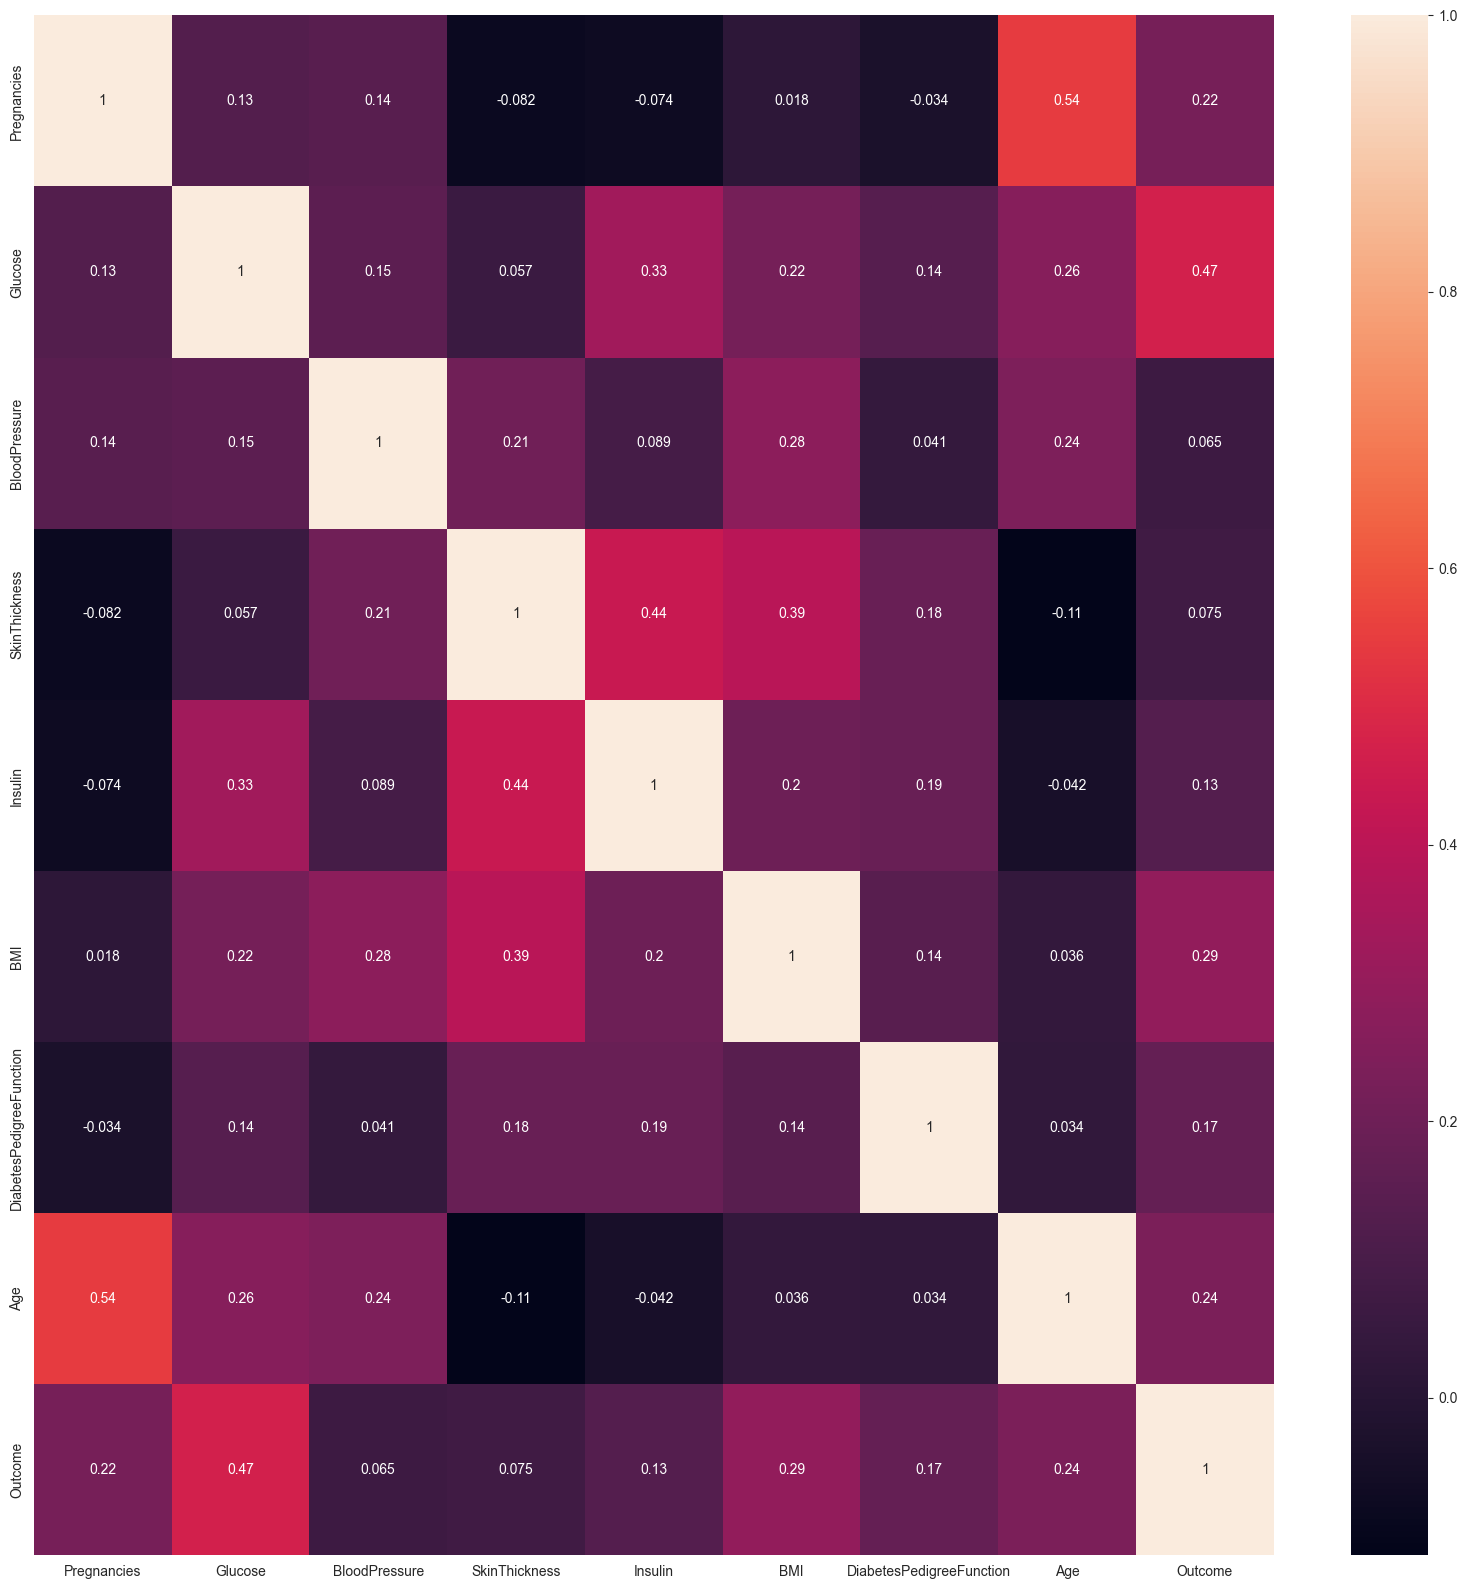

In [44]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True)
plt.show()

In [45]:
# Data balancing
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [46]:
# Separate majority and minority classes
df_majority = df[df.Outcome==0]
df_minority = df[df.Outcome==1]

In [47]:
# Upsample minority class
from sklearn.utils import resample
df_minority_upsampled = resample(df_minority,
                                    replace=True,     # sample with replacement
                                    n_samples=500,    # to match majority class
                                    random_state=123) # reproducible results

In [48]:
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])


In [49]:
# Display new class counts
df_upsampled.Outcome.value_counts()

0    500
1    500
Name: Outcome, dtype: int64

In [50]:
# Normalize DiabetesPedigreeFunction 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_upsampled['DiabetesPedigreeFunction'] = scaler.fit_transform(df_upsampled[['DiabetesPedigreeFunction']])
df_upsampled.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.121279,31,0
3,1,89,66,23,94,28.1,0.039538,21,0
5,5,116,74,0,0,25.6,0.054642,30,0
7,10,115,0,0,0,35.3,0.024878,29,0
10,4,110,92,0,0,37.6,0.050200,30,0


In [51]:
# Split the data into training and testing sets
X = df_upsampled.drop('Outcome', axis=1)
y = df_upsampled['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 

### Best model random forest

In [52]:
# Random Forest for training and testing
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.925


In [53]:
# Save the model RandomForestClassifier
import pickle
filename = 'diabetics_model.sav'
pickle.dump(rfc, open(filename, 'wb'))
 

In [54]:
# Import the model from Saved Model
loaded_model = pickle.load(open(filename, 'rb'))

In [55]:
# Accuracy of saved model
result = loaded_model.score(X_test, y_test)
print(result)

0.925


In [66]:
# unit test
test = np.array([8, 183, 64, 0, 0, 23.3, 0.672, 32])
test = test.reshape(1, -1)
# if yes the print yes either no
if loaded_model.predict(test) == 1:
    print("yes")
else:
    print("no")
 

yes


c:\Users\Mostafizur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import pytest
def test_diabetics():
    test = np.array([8, 183, 64, 0, 0, 23.3, 0.672, 32])
    test = test.reshape(1, -1)
    assert loaded_model.predict(test) == 1
        
test_diabetics()
          
  

## Algorithm

| Algorithm | Accuracy |
|-----------|----------|
| Decision Tree | 0.79 |
| KNN | 0.74 |
| SVM | 0.83 |
| QDA | 0.77 |
|LDA|0.825|
|Naive Bayes algorithm|80.05|
| Decision tree|0.88|
|Random forest algorithm|0.93|
|AdaBoost|0.83|
|k-means clustering|0.58|
|XGBoost|0.90|
|Gradient Boosting|0.88|

In [70]:
#  Decision tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.88


In [69]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.825


In [68]:
# QDA 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred = qda.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.77


Decision Tree

In [56]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier() 
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.89


KNN

In [57]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.75


In [58]:
#SVM
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.815


logisitic regression

In [59]:
# logisitic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.795


c:\Users\Mostafizur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
# Learner regrassion 
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
# lasso regrassion 
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

Naive Bayes

In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.805


 Random Forest

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.93


Gradient boosting 

In [ ]:
# Gradient boosting 
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.88


XGBoost 

In [ ]:
#XGBoost 
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Finished training XGBoost model.")


Accuracy: 0.905
Finished training XGBoost model.


k-means clustering

In [ ]:
#k-means clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train, y_train)
y_pred = kmeans.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.58


AdaBoost

In [ ]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.83


In [ ]:
# Online machine learing 
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.575


In [ ]:
# Batch machine learing 
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.partial_fit(X_train, y_train, classes=np.unique(y_train))
y_pred = sgd.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.525
